## CMPINF-0010-Final-Project

Team Name: Panthers Central

# **The Best Neighborhood Project**

We were assigned to discover which neighborhood in the city of Pittsburgh is the best.

# **Metric**: 
We determined the most logical way to find which neighborhood is the best is to look at which has neighborhood has the highest rate of incidents requiring services provided by the city such as police officers and firefighters. We initially thought to use the amount of household services and the number of arrests in each neighborhood and compare them, but decided to use the datasets about total number of fire incidents and crime incidents to be the deciding factor. We later added a third dataset with arrest data which we weighted the heaviest. We created a point system which adds points with each incident. The higher the score the more city services are used, the best neighborhood would have the lowest combined score and would require city services the least(Police and Firefighters).

# Test Number 1: Number of Arrests Made

In [1]:
import pandas as pd
pgh_arrests=pd.read_csv("https://data.wprdc.org/dataset/bce15079-618a-4bf3-badf-8aa372c3aea2/resource/8ce92a4b-fa62-45c3-8cee-cc58fefede75/download/arrests-for-major-crimes-1972.csv")
pgh_arrests.head(10)

,neighborhood,population,overall_crime_rate,number_arrests_murder,crime_rate_murder,number_arrests_rape,crime_rate_rape,number_arrests_robbery,crime_rate_robbery,number_arrests_assault,crime_rate_assault,number_arrests_burglary,crime_rate_burglary,number_arrests_larceny,crime_rate_larceny
0,31st Ward,7594,2.03,0,0.00,1,0.01,7,0.09,45,0.60,55,0.73,45,0.60
1,Allegheny Center,588,52.04,0,0.00,2,0.34,24,4.08,30,5.10,14,2.38,236,40.14
2,Allegheny West,1159,14.33,1,0.09,3,0.26,16,1.38,17,1.47,53,4.57,76,6.56
3,Allentown,5042,3.13,0,0.00,1,0.08,23,0.46,41,0.81,48,0.95,45,0.89
4,Arlington,4758,2.50,0,0.00,0,0.00,7,0.15,33,0.69,44,0.92,35,0.74
5,Arlington Heights,1989,6.19,0,0.00,2,0.10,14,0.70,61,3.07,21,1.06,25,1.26
6,Banksville,6235,1.94,0,0.00,2,0.03,8,0.13,8,0.13,53,0.85,50,0.80
7,Bedford Dwellings,3635,2.64,1,0.03,4,0.11,11,0.30,25,0.69,36,0.99,19,0.52
8,Beechview,12965,1.98,1,0.01,1,0.01,26,0.20,43,0.33,84,0.65,101,0.78
9,Beltzhoover,5980,6.37,1,0.02,3,0.05,63,1.05,58,0.97,121,2.02,135,2.26


First, we printed the first ten rows in this dataset to get an idea of how it was displayed. This allowed us to see that there were several unwanted colomns describing the rate at which incidents happen rather than the quantity of incidents happening. 

In [2]:
import pandas as pd
pgh_arrests=pd.read_csv("https://data.wprdc.org/dataset/bce15079-618a-4bf3-badf-8aa372c3aea2/resource/8ce92a4b-fa62-45c3-8cee-cc58fefede75/download/arrests-for-major-crimes-1972.csv")
pgh_arrests[['neighborhood', 'number_arrests_murder','number_arrests_larceny','number_arrests_rape', 'number_arrests_robbery', 'number_arrests_assault','number_arrests_burglary' ]].head(30)

,neighborhood,number_arrests_murder,number_arrests_larceny,number_arrests_rape,number_arrests_robbery,number_arrests_assault,number_arrests_burglary
0,31st Ward,0,45,1,7,45,55
1,Allegheny Center,0,236,2,24,30,14
2,Allegheny West,1,76,3,16,17,53
3,Allentown,0,45,1,23,41,48
4,Arlington,0,35,0,7,33,44
5,Arlington Heights,0,25,2,14,61,21
6,Banksville,0,50,2,8,8,53
7,Bedford Dwellings,1,19,4,11,25,36
8,Beechview,1,101,1,26,43,84
9,Beltzhoover,1,135,3,63,58,121


To solve this problem we organized the table by removing the excess columns. Only the columns with the quantities of each type of incident were left. Now we have a dataset we can work with!

In [6]:
import pandas as pd
pgh_arrests=pd.read_csv("https://data.wprdc.org/dataset/bce15079-618a-4bf3-badf-8aa372c3aea2/resource/8ce92a4b-fa62-45c3-8cee-cc58fefede75/download/arrests-for-major-crimes-1972.csv")
pgh_arrests['sum_of_reports']=pgh_arrests['number_arrests_murder']+pgh_arrests['number_arrests_larceny']+pgh_arrests['number_arrests_rape']+ pgh_arrests['number_arrests_robbery']+pgh_arrests['number_arrests_assault']+pgh_arrests['number_arrests_burglary']
print(pgh_arrests[['neighborhood','sum_of_reports']].head(30))
pgh_arrests[['neighborhood','sum_of_reports']].tail(40)

                            neighborhood  sum_of_reports
0                              31st Ward             153
1                       Allegheny Center             306
2                         Allegheny West             166
3                              Allentown             158
4                              Arlington             119
5                      Arlington Heights             123
6                             Banksville             121
7                      Bedford Dwellings              96
8                              Beechview             256
9                            Beltzhoover             381
10                            Bloomfield             565
11                               Bon Air              42
12                      Brighton Heights             174
13                             Brookline             321
14                       California Ave.              58
15                               Carrick             308
16                    Central N

,neighborhood,sum_of_reports
30,Homewood North,276
31,Homewood South,595
32,Homewood West,179
33,Knoxville,193
34,Larimer,367
35,Lawrenceville,320
36,Lincoln-Lemington-Belmar,277
37,Lower Lawrenceville,316
38,Lower Oakland,645
39,Manchester,501


Next, we added all the columns with each type of incident (murder, rape, burglary, assault, robbery, and larceny) to get the sum for each neighborhood and created a new column in the dataset called sum_of_arrests. Now we just need to organize. 

In [7]:
import pandas as pd
pgh_arrests=pd.read_csv("https://data.wprdc.org/dataset/bce15079-618a-4bf3-badf-8aa372c3aea2/resource/8ce92a4b-fa62-45c3-8cee-cc58fefede75/download/arrests-for-major-crimes-1972.csv")
pgh_arrests['sum_of_reports']=pgh_arrests['number_arrests_murder']+pgh_arrests['number_arrests_larceny']+pgh_arrests['number_arrests_rape']+ pgh_arrests['number_arrests_robbery']+pgh_arrests['number_arrests_assault']+pgh_arrests['number_arrests_burglary']
amount=pgh_arrests[['neighborhood','sum_of_reports']].sort_values(by='sum_of_reports', ascending=False)
print(amount.head(30))
amount.tail(40)

                           neighborhood  sum_of_reports
52                            Shadyside            1229
59      Squirrel Hill - South of Forbes            1066
43                        North Oakland             926
58      Squirrel Hill - North of Forbes             816
16                   Central North Side             728
40                          Middle Hill             710
20                         East Liberty             674
38                        Lower Oakland             645
42  Mount Washington - Duquesne Heights             602
31                       Homewood South             595
10                           Bloomfield             565
64                      Terrace Village             544
55                      Southside Flats             518
39                           Manchester             501
46                          Perry South             496
25                             Garfield             420
65                            The Bluff         

,neighborhood,sum_of_reports
67,Upper Hill,280
36,Lincoln-Lemington-Belmar,277
30,Homewood North,276
54,South Oakland,257
8,Beechview,256
44,North View Heights,245
53,Sheraton Chartiers,196
33,Knoxville,193
32,Homewood West,179
12,Brighton Heights,174


We listed the data from highest incident total to lowest incident total for each neighborhood using the .sort_values() method. The data shows that Shadyside has the highest total with 1226 whereas East Carnegie has the lowest at only 18. Now we can get a better visual of the graph.

We printed bar graph showing the sum of arrests for each neighborhood in Pittsburgh.

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
pgh_arrests=pd.read_csv("https://data.wprdc.org/dataset/bce15079-618a-4bf3-badf-8aa372c3aea2/resource/8ce92a4b-fa62-45c3-8cee-cc58fefede75/download/arrests-for-major-crimes-1972.csv")
neighborhoods=pgh_arrests['neighborhood']
pgh_arrests['sum_of_arrests']=pgh_arrests['number_arrests_murder']+pgh_arrests['number_arrests_larceny']+pgh_arrests['number_arrests_rape']+ pgh_arrests['number_arrests_robbery']+pgh_arrests['number_arrests_assault']+pgh_arrests['number_arrests_burglary']
pgh_reports_total=pgh_arrests[['neighborhood','sum_of_arrests']].plot.bar(figsize=(25,2),width=0.5, position=1)
plt.xticks(pgh_arrests.index,pgh_arrests['neighborhood'].values, fontsize=14)
plt.ylabel('Number of Incident Reports')

Text(0,0.5,'Number of Incident Reports')

# Test Number 2: Number of Fire Incidents 

In [9]:
import pandas as pd
pgh_fires=pd.read_csv("https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02")
pgh_fires.head(10)

,call_no,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",2016-04-21T05:01:04,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",2018-03-13T08:34:43,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",2018-03-13T11:54:23,0,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",2017-05-31T08:39:47,0,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",2018-03-09T10:26:42,1,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607
5,F180021782,150.0,"Outside rubbish fire, Other","S 7TH ST & E CARSON ST, PITTSBURGH PA 15203",2018-03-12T09:13:28,0,231EN24,1702.0,South Side Flats,3.0,17.0,4.200317e+10,4.0,17.0,3.0,4-2,40.428618,-79.992239
6,F180022495,113.0,"Cooking fire, confined to container","200 BLOCK E OHIO ST, PITTSBURGH PA 15212",2018-03-14T19:46:10,1,231EN32,2204.0,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-6,40.453022,-80.003660
7,F180022546,111.0,Building fire,"7000 BLOCK LEMINGTON AVE, PITTSBURGH PA 15206",2018-03-14T23:49:22,1,231EN15,1203.0,Lincoln-Lemington-Belmar,9.0,12.0,4.200312e+10,2.0,12.0,5.0,3-18,40.471358,-79.898240
8,F180022773,111.0,Building fire,"100 BLOCK SPENCER AVE, PITTSBURGH PA 15227",2018-03-15T20:39:05,1,231EN23,2904.0,Carrick,4.0,29.0,4.200329e+10,4.0,29.0,3.0,4-15,40.385494,-79.977200
9,F170044316,131.0,Passenger vehicle fire,"1200 BLOCK WESTFIELD ST, PITTSBURGH PA 15216",2017-06-03T01:31:13,0,231EN28,1916.0,Beechview,4.0,19.0,4.200319e+10,5.0,19.0,6.0,4-28,40.415219,-80.019516


First, we printed the first ten rows in this dataset to look at what was stored in it. This dataset has the same problem of unwanted colomn categories.

In [18]:
import pandas as pd
pgh_fires=pd.read_csv("https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02")
pgh_fires[['neighborhood', 'type_description']]

,neighborhood,type_description
0,NaN,Building fire
1,NaN,Building fire
2,NaN,Passenger vehicle fire
3,Fineview,Passenger vehicle fire
4,Fairywood,Building fire
5,South Side Flats,"Outside rubbish fire, Other"
6,Allegheny Center,"Cooking fire, confined to container"
7,Lincoln-Lemington-Belmar,Building fire
8,Carrick,Building fire
9,Beechview,Passenger vehicle fire


In [19]:
import pandas as pd
pgh_fires=pd.read_csv("https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02")
total_fires=pgh_fires['type_description'].groupby(pgh_fires['neighborhood']).value_counts()
print(total_fires)

neighborhood      type_description                               
Allegheny Center  Cooking fire, confined to container                15
                  Outside rubbish, trash or waste fire                6
                  Dumpster or other outside trash receptacle fire     5
                  Natural vegetation fire, Other                      5
                  Brush or brush-and-grass mixture fire               3
                  Building fire                                       2
                  Special outside fire, Other                         2
                  Trash or rubbish fire, contained                    2
                  Fire in portable building, fixed location           1
                  Fuel burner/boiler malfunction, fire confined       1
                  Mobile property (vehicle) fire, Other               1
                  Outside equipment fire                              1
                  Outside rubbish fire, Other                         

For this data table, we grouped each fire incident type reported with the corresponding neighborhood and summed up each fire incident type listed. I used the the .valuecounts() method to get the number of different fire incidents reported in a neighborhood. Now we need to organize the data so that it can be visualized.

In [20]:
import pandas as pd
pgh_fires=pd.read_csv("https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02")
pgh_fires_sum=pgh_fires['type_description'].groupby(pgh_fires['neighborhood']).count()
print(pgh_fires_sum)

neighborhood
Allegheny Center              46
Allegheny West                32
Allentown                     89
Arlington                     39
Arlington Heights              9
Banksville                    49
Bedford Dwellings             31
Beechview                    102
Beltzhoover                   97
Bloomfield                   120
Bluff                         87
Bon Air                       16
Brighton Heights             105
Brookline                    127
California-Kirkbride          31
Carrick                      221
Central Business District    186
Central Lawrenceville         58
Central Northside             95
Central Oakland               69
Chartiers City                11
Chateau                       34
Crafton Heights               66
Crawford-Roberts              77
Duquesne Heights              23
East Allegheny                78
East Carnegie                  6
East Hills                   122
East Liberty                 149
Elliott                       

We grouped the data by neighborhood and listed their respective fire incident total.

In [42]:
import pandas as pd
pgh_fires=pd.read_csv("https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02")
pgh_fires_sum=pgh_fires['type_description'].groupby(pgh_fires['neighborhood']).count()
weight=pd.Series([5])
pgh_fires_sum.mul(weight, axis=0) 
print(pgh_fires_sum.sort_values(ascending=False))


neighborhood
Carrick                      221
Central Business District    186
South Side Flats             184
Hazelwood                    183
Squirrel Hill South          179
East Liberty                 149
Homewood North               146
Lincoln-Lemington-Belmar     146
Mount Washington             145
Sheraden                     135
Perry South                  128
Homewood South               128
Brookline                    127
Shadyside                    126
East Hills                   122
Bloomfield                   120
Knoxville                    117
Brighton Heights             105
Larimer                      102
Beechview                    102
Beltzhoover                   97
Marshall-Shadeland            97
Squirrel Hill North           96
Central Northside             95
North Oakland                 92
Allentown                     89
Bluff                         87
Perry North                   83
Greenfield                    82
Spring Hill-City View         

Finally we listed the data in order of highest fire incidents reported to lowest. The dataset reveals that Carrick had the highest with 221 and Mount Oliver Borough had the lowest fire incidents reported with only 4.

AxesSubplot(0.125,0.125;0.775x0.755)


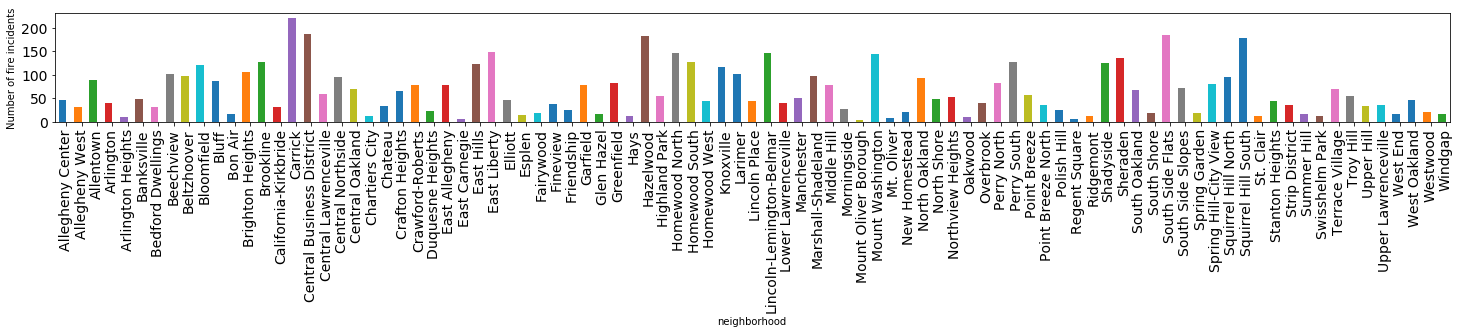

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
pgh_fires=pd.read_csv("https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02")
pgh_fires_sum=pgh_fires['type_description'].groupby(pgh_fires['neighborhood']).count()
plt.ylabel('Number of fire incidents')
print(pgh_fires_sum.plot.bar(figsize=(25,2), width=0.5, position=1, fontsize=14))

Finally we're able to neatly visualize the data with a bar graph displaying the different number of fire incidents reported in each Pittsburgh neighborhood.

# Comparing the Two Datasets

Now let's make a datatable with both the total numer of arrests for crimes and fire incidents reported aligned with each neighborhood.

In [17]:
import pandas as pd
pgh_fires=pd.read_csv("https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02")
pgh_fires_sum=pgh_fires['type_description'].groupby(pgh_fires['neighborhood']).count()
pgh_arrests=pd.read_csv("https://data.wprdc.org/dataset/bce15079-618a-4bf3-badf-8aa372c3aea2/resource/8ce92a4b-fa62-45c3-8cee-cc58fefede75/download/arrests-for-major-crimes-1972.csv")
pgh_arrests['sum_of_arrests']=pgh_arrests['number_arrests_murder']+pgh_arrests['number_arrests_larceny']+pgh_arrests['number_arrests_rape']+ pgh_arrests['number_arrests_robbery']+pgh_arrests['number_arrests_assault']+pgh_arrests['number_arrests_burglary']
pgh_arrests_total=pgh_arrests[['sum_of_arrests', 'neighborhood']]
pgh_total=pd.merge(pgh_arrests['sum_of_arrests'].to_frame(),pgh_fires_sum.to_frame(),left_on=None, right_on=None,left_index=False, right_index=False, on=pgh_arrests['neighborhood'])
pgh_arrests_total

,sum_of_arrests,neighborhood
0,153,31st Ward
1,306,Allegheny Center
2,166,Allegheny West
3,158,Allentown
4,119,Arlington
5,123,Arlington Heights
6,121,Banksville
7,96,Bedford Dwellings
8,256,Beechview
9,381,Beltzhoover


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
pgh_fires=pd.read_csv("https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02")
pgh_fires_sum=pgh_fires['type_description'].groupby(pgh_fires['neighborhood']).count()
#print(pgh_fires_sum.plot.bar(figsize=(25,2), width=0.5, position=1, fontsize=14))
pgh_arrests=pd.read_csv("https://data.wprdc.org/dataset/bce15079-618a-4bf3-badf-8aa372c3aea2/resource/8ce92a4b-fa62-45c3-8cee-cc58fefede75/download/arrests-for-major-crimes-1972.csv")
neighborhoods=pgh_arrests['neighborhood']
pgh_arrests['sum_of_arrests']=pgh_arrests['number_arrests_murder']+pgh_arrests['number_arrests_larceny']+pgh_arrests['number_arrests_rape']+ pgh_arrests['number_arrests_robbery']+pgh_arrests['number_arrests_assault']+pgh_arrests['number_arrests_burglary']
#pgh_arrests_total=pgh_arrests[['neighborhood','sum_of_arrests']].plot.bar(figsize=(25,2),width=0.5, position=1)
plt.xticks(pgh_arrests.index,pgh_arrests['neighborhood'].values, fontsize=14)


# *The Best Neighborhood*
Based on the results from our data, we can conclude that...